<a href="https://colab.research.google.com/github/carlosurcino/Taller_ICD_Rm/blob/main/SR_ALTA%20CALIDAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gamma Earth S2DR3 - Sentinel-2 Deep Resolution 3.0

## Effective 10-Band 10x Single Image Super-Resolution for Sentinel-2

The notebook showcases the performance of the S2DR3 module. Detailed description of the module, as well as performance analysis can be found in the following [white paper](https://medium.com/@ya_71389/c71a601a2253). Please contact info@gamma.earth for extended functionality, commercial use and other enquiries.

S2DR3 module will fetch Sentinel-2 data for the provided location and data and will super-resolve the 10 multispectral bands from the original 10m and 20m resolution to the targe spatial resolution of 1m/px. The output is a 10-band 1m/px multispectral georeferenced TIF image. The output product will be generated in the local filesystem path '/content/output' located here:

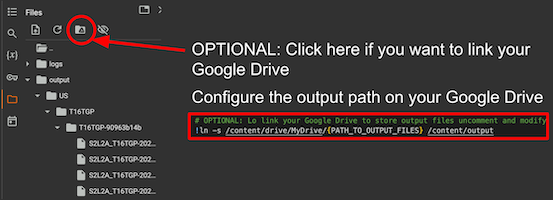

The output will contain 4 products:

*   S2L2Ax10_T[MGRS]-[DATE]-[UID]_MS.tif – 10-band multi-spectal image
*   S2L2Ax10_T[MGRS]-[DATE]-[UID]_TCI.tif – True colour RGB image
*   S2L2Ax10_T[MGRS]-[DATE]-[UID]_NDVI.tif – Pseudo-colour NDVI image
*   S2L2Ax10_T[MGRS]-[DATE]-[UID]_IRP.tif – Ifra-red preudo-colour image

The order of the 10 bands in the multi-spectral product is:
B02, B03, B04, B05, B06, B07, B08, B8A, B11, B12

# Installation

In [1]:
# Make sure to select T4 GPU instance from the Runtime/Change-runtime-type menu
# OPTIONAL: Lo link your Google Drive to store output files uncomment and modify the following line
#!ln -s /content/drive/MyDrive/{PATH_TO_OUTPUT_FILES} /content/output
!pip -q install https://storage.googleapis.com/0x7ff601307fa5/s2dr3-20250905.1-cp312-cp312-linux_x86_64.whl

In [2]:
# Gamma Earth S2DR3 - Sentinel-2 Deep Resolution 3.0
!pip -q install https://storage.googleapis.com/0x7ff601307fa5/s2dr3-20250905.1-cp312-cp312-linux_x86_64.whl

import json
import geopandas as gpd
from shapely.geometry import Polygon

# Definir área de 400x400 km
center_lon =  -91.537905  # Example: New York City longitude
center_lat =  17.806759   # Example: New York City latitude

# Crear bounding box de 400x400 km
delta = 1.8  # Aproximadamente 200 km desde el centro (400/2 = 200 km → 200/111 ≈ 1.8 grados)
coords = [
    (center_lon - delta, center_lat - delta),
    (center_lon + delta, center_lat - delta),
    (center_lon + delta, center_lat + delta),
    (center_lon - delta, center_lat + delta)
]

geometry = Polygon(coords)
gdf = gpd.GeoDataFrame(geometry=[geometry], crs="EPSG:4326")
geojson_data = json.loads(gdf.to_json())

print("Área de 400x400 km definida:")
print(f"Centro: {center_lon}, {center_lat}")
print(f"Extensión: {delta*2} grados (aprox 400km)")

# Ahora exploremos el paquete s2dr3
try:
    import s2dr3

    # Mostrar todas las funciones disponibles
    print("\n=== EXPLORANDO s2dr3 ===")
    all_items = [item for item in dir(s2dr3) if not item.startswith('_')]
    print("Elementos disponibles:", all_items)

    # Buscar la función principal
    main_function = None
    for item in all_items:
        item_lower = item.lower()
        if any(keyword in item_lower for keyword in ['process', 'run', 'main', 'execute']):
            main_function = item
            break

    if main_function:
        print(f"\nFUNCIÓN PRINCIPAL ENCONTRADA: {main_function}")
        func = getattr(s2dr3, main_function)

        # Intentar usar la función
        try:
            result = func(
                geometry=geojson_data,
                date="2025-05-18",
                cloud_cover=10,
                output_dir="/content/output"
            )
            print("¡Procesamiento iniciado exitosamente!")
        except Exception as e:
            print(f"Error al ejecutar {main_function}: {e}")
            print("Probando con diferentes parámetros...")

            # Intentar con diferentes nombres de parámetros
            try:
                result = func(
                    area=geojson_data,
                    date="2025-05-18",
                    cloud_cover=10
                )
            except Exception as e2:
                print(f"Error alternativo: {e2}")
    else:
        print("\nNo se encontró una función principal obvia.")
        print("Funciones disponibles:", all_items)

except ImportError as e:
    print(f"Error importando s2dr3: {e}")
except Exception as e:
    print(f"Error inesperado: {e}")

Área de 400x400 km definida:
Centro: -91.537905, 17.806759
Extensión: 3.6 grados (aprox 400km)

=== EXPLORANDO s2dr3 ===
Elementos disponibles: []

No se encontró una función principal obvia.
Funciones disponibles: []


Fetching data for T15QXV-40d4a047a-20250518 .......... done. 
Processing S2L2A_T15QXV-40d4a047a-20250518_MS . done 
Postprocessing S2L2A_T15QXV-40d4a047a-20250518_MS ......... done

Find results at the following path: /content/output
Click the link below for preview:

https://gamayos.github.io/gamma-earth-api/s2dr3-demo-20250305.html?ds=MX-T15QXV-40d4a047a-20250518#15/17.8068/-91.5379



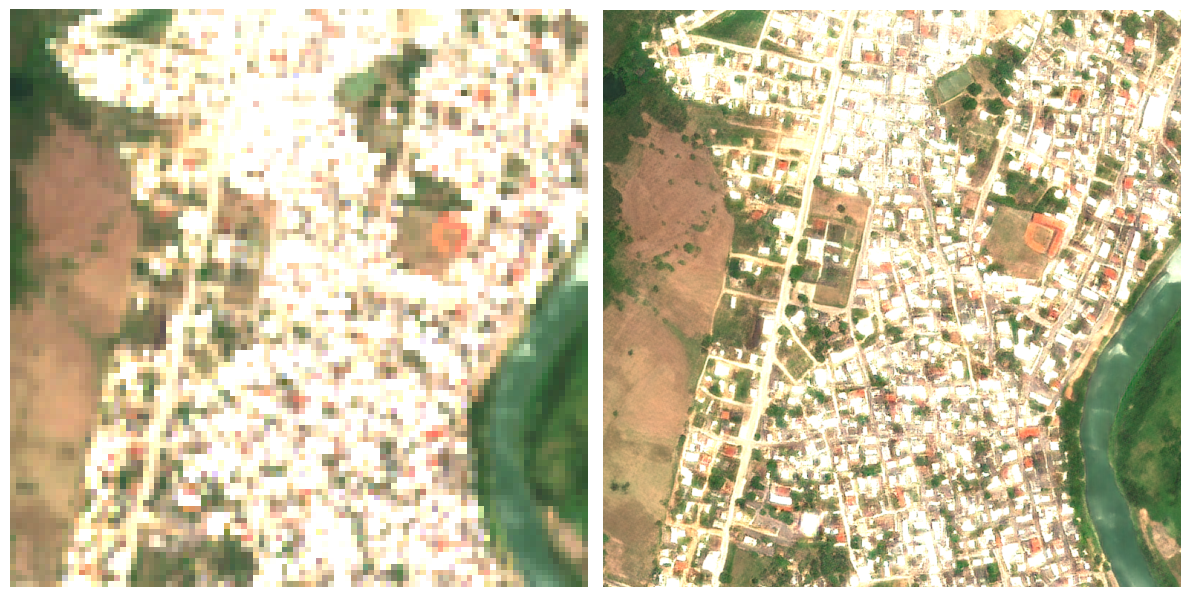

In [3]:
import s2dr3.inferutils

# Specify the target location in the Lon,Lat (X,Y) format.
# The model will process a 4x4 km bounding box around the target location
lonlat = (-91.53790,17.806759) # NOTE THE X,Y FORMAT!

# Specify the target date. Please note, S2DR3 model will process the date
# from the Sentinel-2 catalogue that is closest to the specified date.
# Selected date may be ocluded by clouds. Please consult the Copernucus
# Dataspace for data availability https://browser.dataspace.copernicus.eu
# Archive images are available from 2018-01-01.
date = '2025-05-18'

# Due to high demand, the preview link may take some time to load.
# !!!Please note: the image below is just a small sample intended to indicate
# successful complition of the inference. Click the generated preview link
# to see the actual results.
s2dr3.inferutils.test(lonlat, date)

# License

Copyright (c) Gamma Earth Sarl

The software is provided for testing, performance evaluation and validation. All rights are reserved by the copyright owner. For extended functionality and commercial use please contact info@gamma.earth

Please use the following citation for S2DR3-related academic publications:

Yosef Akhtman, S2DR3: Effective 10-Band 10x Single Image Super-Resolution for Sentinel-2. Medium: https://medium.com/@ya_71389/c71a601a2253

Please note that selected satellite images generated by anonymous users may be reused for publicity.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE